<a href="https://colab.research.google.com/github/Carol12390/Fake-News-Detection/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#Load datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 1    # Fake = 1
true["label"] = 0    # Real = 0

df = pd.concat([fake, true]).sample(frac=1).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,South Korea to resume building two new nuclear...,SEOUL (Reuters) - South Korea will resume the ...,worldnews,"October 24, 2017",0
1,Dan Rather Has SHOCKING Response After Trump ...,Legendary reporter Dan Rather has commented on...,News,"January 4, 2017",1
2,Lebanese president hopes Hariri visit to Franc...,BEIRUT/PARIS (Reuters) - Lebanon s president s...,worldnews,"November 16, 2017",0
3,TRUMP EXPOSES OBAMA’S INCOMPETENCE: Cuts EPA B...,Although Obama had 3 years to take action to f...,left-news,"Jul 6, 2017",1
4,"Obama, Senate Democrats urge Zika funding vote...",WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"August 4, 2016",0


label
1    23481
0    21417
Name: count, dtype: int64


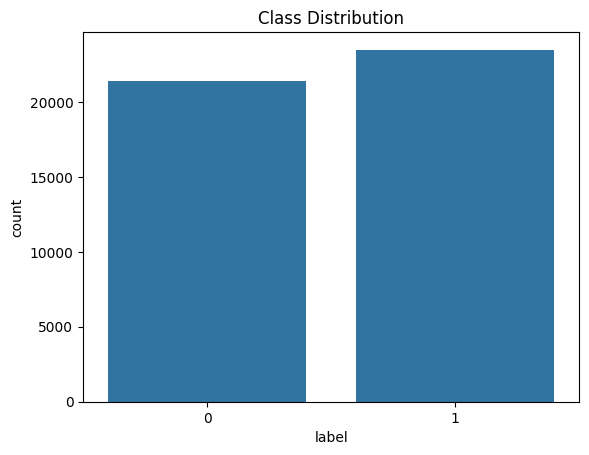

In [ ]:
#Data Visualisation
print(df["label"].value_counts())

sns.countplot(data=df, x="label")
plt.title("Class Distribution")
plt.show()


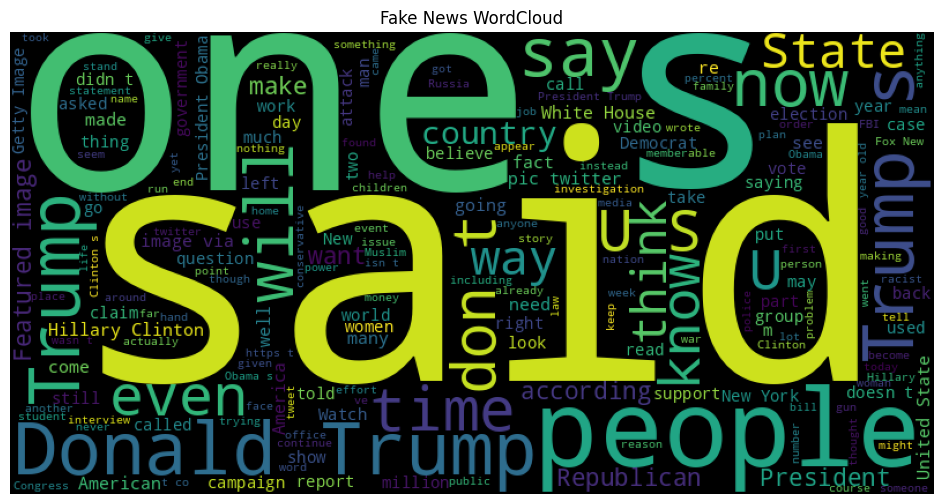

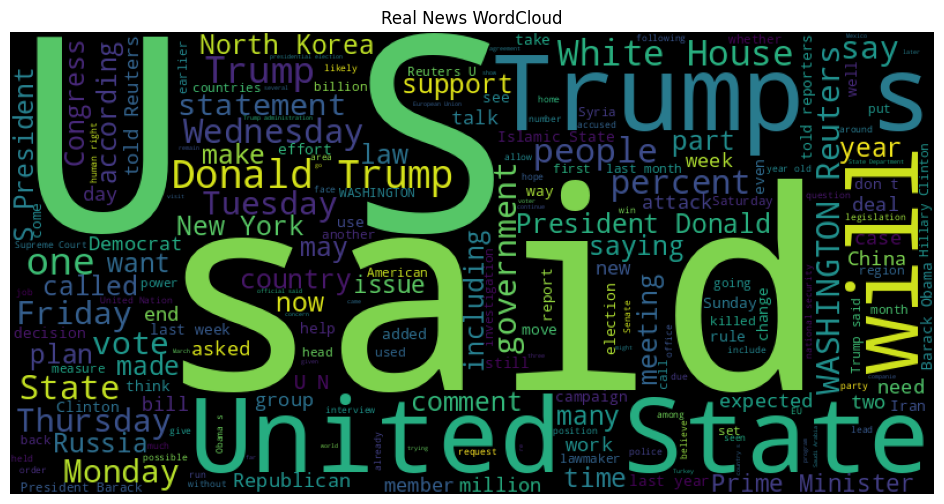

In [ ]:
#Word Clouds
fake_text = " ".join(fake["text"].astype(str))
true_text = " ".join(true["text"].astype(str))

plt.figure(figsize=(12,6))
wc_fake = WordCloud(width=800, height=400).generate(fake_text)
plt.imshow(wc_fake)
plt.axis("off")
plt.title("Fake News WordCloud")
plt.show()

plt.figure(figsize=(12,6))
wc_true = WordCloud(width=800, height=400).generate(true_text)
plt.imshow(wc_true)
plt.axis("off")
plt.title("Real News WordCloud")
plt.show()

In [ ]:
#Text Preprocessing
stop_words = set(stopwords.words("english"))
lemm = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemm.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean"] = df["text"].astype(str).apply(preprocess)
df.head()

,title,text,subject,date,label,clean
0,South Korea to resume building two new nuclear...,SEOUL (Reuters) - South Korea will resume the ...,worldnews,"October 24, 2017",0,seoul reuters south korea resume suspended con...
1,Dan Rather Has SHOCKING Response After Trump ...,Legendary reporter Dan Rather has commented on...,News,"January 4, 2017",1,legendary reporter dan rather commented ridicu...
2,Lebanese president hopes Hariri visit to Franc...,BEIRUT/PARIS (Reuters) - Lebanon s president s...,worldnews,"November 16, 2017",0,beirutparis reuters lebanon president said thu...
3,TRUMP EXPOSES OBAMA’S INCOMPETENCE: Cuts EPA B...,Although Obama had 3 years to take action to f...,left-news,"Jul 6, 2017",1,although obama 3 year take action fix flint wa...
4,"Obama, Senate Democrats urge Zika funding vote...",WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"August 4, 2016",0,washington reuters president barack obama thur...


In [ ]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    df["clean"], df["label"], test_size=0.2, random_state=42
)

In [ ]:
#Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
#Rule-based Approach:lexicon classifier.
fake_keywords = ["click", "shocking", "breaking", "urgent", "exclusive", "must see"]

def rule_based_classifier(text):
    for word in fake_keywords:
        if word in text.lower():
            return 1
    return 0

y_pred_rule = X_test.apply(rule_based_classifier)

print(classification_report(y_test, y_pred_rule))

              precision    recall  f1-score   support

           0       0.49      0.94      0.65      4310
           1       0.65      0.10      0.18      4670

    accuracy                           0.50      8980
   macro avg       0.57      0.52      0.41      8980
weighted avg       0.57      0.50      0.40      8980



In [ ]:
#Machine Learning Models

#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

Naive Bayes Accuracy: 0.9407572383073497
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4310
           1       0.94      0.95      0.94      4670

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
#Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Regression Accuracy: 0.989532293986637
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4310
           1       0.99      0.99      0.99      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
#Support Vector Machine (SVM)
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
pred_svm = svm.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

SVM Accuracy: 0.9946547884187082
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4310
           1       0.99      1.00      0.99      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train_tfidf, y_train)
pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest Accuracy: 0.9978841870824053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4310
           1       1.00      1.00      1.00      4670

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
#ROC-AUC Rule-based (binary predictions only)
roc_rule = roc_auc_score(y_test, y_pred_rule)
fpr_rule, tpr_rule, _ = roc_curve(y_test, y_pred_rule)

print("Rule-based ROC-AUC:", roc_rule)

Rule-based ROC-AUC: 0.5211757925644758


In [ ]:
#ROC-AUC Naive Bayes
nb_probs = nb.predict_proba(X_test_tfidf)[:, 1]

nb_auc = roc_auc_score(y_test, nb_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

print("Naive Bayes ROC-AUC:", nb_auc)

Naive Bayes ROC-AUC: 0.9817072492137701


In [ ]:
#ROC-AUC Logistic Regression
lr_probs = lr.predict_proba(X_test_tfidf)[:, 1]

lr_auc = roc_auc_score(y_test, lr_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

print("Logistic Regression ROC-AUC:", lr_auc)

Logistic Regression ROC-AUC: 0.9985904996596731


In [ ]:
# ROC-AUC SVM (decision function)
svm_scores = svm.decision_function(X_test_tfidf)
roc_svm = roc_auc_score(y_test, svm_scores)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)

print("SVM ROC-AUC:", roc_svm)

SVM ROC-AUC: 0.9994424598935795


In [ ]:
#ROC-AUC Random Forest
rf_probs = rf.predict_proba(X_test_tfidf)[:, 1]

rf_auc = roc_auc_score(y_test, rf_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

print("Random Forest ROC-AUC:", rf_auc)

Random Forest ROC-AUC: 0.9999719043904669


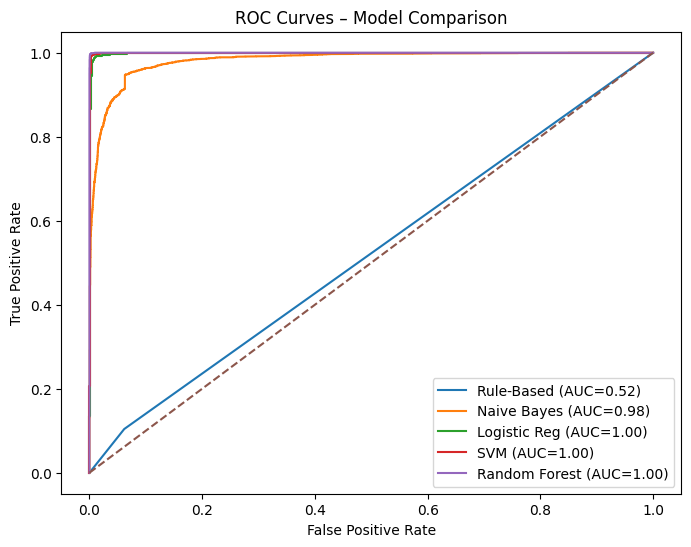

In [ ]:
plt.figure(figsize=(8,6))

# Compute ROC curves
fpr_rule, tpr_rule, _ = roc_curve(y_test, y_pred_rule)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Plot
plt.plot(fpr_rule, tpr_rule, label=f"Rule-Based (AUC={roc_rule:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={nb_auc:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Reg (AUC={lr_auc:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={rf_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Model Comparison")
plt.legend()
plt.show()

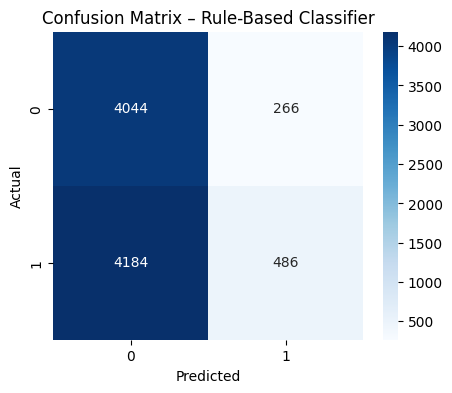

In [ ]:
#Confusion Matrix (Rule-based Classifier)
cm_rule = confusion_matrix(y_test, y_pred_rule)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rule, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Rule-Based Classifier")
plt.show()

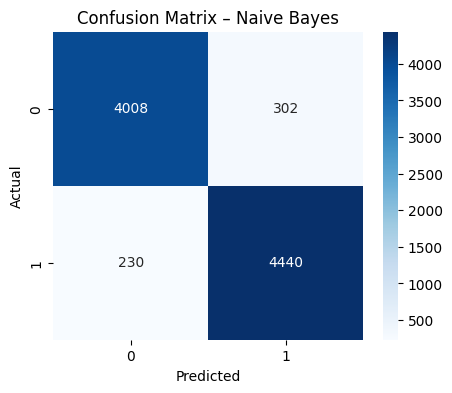

In [ ]:
#Confusion Matrix (Naive Bayes)
cm_nb = confusion_matrix(y_test, pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Naive Bayes")
plt.show()

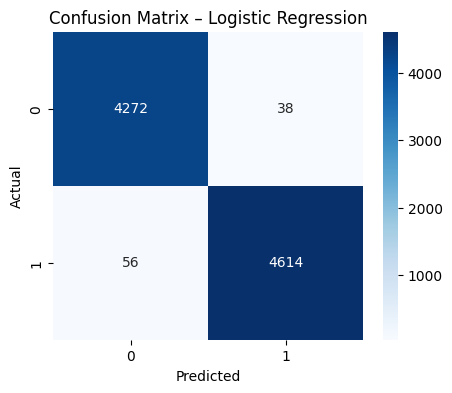

In [ ]:
#Confusion Matrix (Logistic Regression)
cm_lr = confusion_matrix(y_test, pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

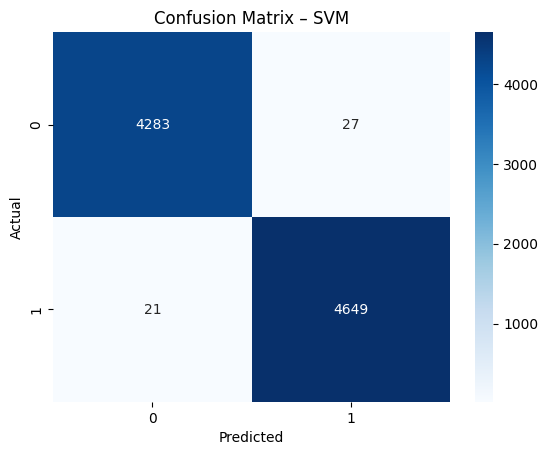

In [ ]:
#Confusion Matrix (SVM)
cm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()

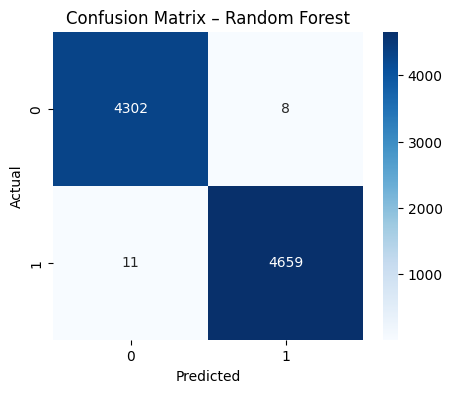

In [ ]:
#Confusion Matrix (Random Forest)
cm_rf = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

In [ ]:
#Comparison Table

results = pd.DataFrame({
    "Model": [
        "Rule-Based",
        "Naive Bayes",
        "Logistic Regression",
        "SVM",
        "Random Forest"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rule),
        accuracy_score(y_test, pred_nb),
        accuracy_score(y_test, pred_lr),
        accuracy_score(y_test, pred_svm),
        accuracy_score(y_test, pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_rule, average="weighted", zero_division=0),
        precision_score(y_test, pred_nb, average="weighted", zero_division=0),
        precision_score(y_test, pred_lr, average="weighted", zero_division=0),
        precision_score(y_test, pred_svm, average="weighted", zero_division=0),
        precision_score(y_test, pred_rf, average="weighted", zero_division=0)
    ],
    "Recall": [
        recall_score(y_test, y_pred_rule, average="weighted", zero_division=0),
        recall_score(y_test, pred_nb, average="weighted", zero_division=0),
        recall_score(y_test, pred_lr, average="weighted", zero_division=0),
        recall_score(y_test, pred_svm, average="weighted", zero_division=0),
        recall_score(y_test, pred_rf, average="weighted", zero_division=0)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_rule, average="weighted", zero_division=0),
        f1_score(y_test, pred_nb, average="weighted", zero_division=0),
        f1_score(y_test, pred_lr, average="weighted", zero_division=0),
        f1_score(y_test, pred_svm, average="weighted", zero_division=0),
        f1_score(y_test, pred_rf, average="weighted", zero_division=0)
    ]
})

results

,Model,Accuracy,Precision,Recall,F1-score
0,Rule-Based,0.504454,0.571987,0.504454,0.402837
1,Naive Bayes,0.940757,0.940833,0.940757,0.940734
2,Logistic Regression,0.989532,0.989542,0.989532,0.989533
3,SVM,0.994655,0.994655,0.994655,0.994655
4,Random Forest,0.997884,0.997884,0.997884,0.997884
